## Project Housing Prices 
### 1. Loading Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
train_df = pd.read_csv("./data/train.csv",index_col="Id")
test_df = pd.read_csv("./data/test.csv",index_col='Id')

In [3]:
train_df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
# review Data
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. Feature Classification:Categorical vs Numerical
* this helps us select the appropriale plots for visualization.
##### Which features are categorical?
* Categorical Features: nominal,ordinal,ratio,interval
* To classify the samples into sets of simliar samples
##### Which features are numerical?
* Numerical features: `discrete`,`continuos`,or `timeseries`
* These values change from samples to sample

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

## Các feature đặc trưng tiềm năng:
1. **OverallQual**: Chất lượng tổng thể của vật liệu và hoàn thiện. Đây là yếu tố quan trọng trong việc xác định giá trị của một căn nhà.
2. **GrLivArea**: Diện tích không gian sống trên mặt đất. Căn nhà có diện tích lớn thường có giá cao hơn.
3. **YearBuilt**: Năm xây dựng của căn nhà. Căn nhà mới thường có giá cao hơn căn nhà cũ.
4. **GarageArea**: Diện tích garage. Garage lớn hơn có thể làm tăng giá trị nhà.
5. **TotRmsAbvGrd**: Tổng số phòng trên mặt đất (không tính phòng tắm). Càng nhiều phòng có thể có ảnh hưởng đến giá trị.
6. **1stFlrSF**: Diện tích sàn tầng 1. Thông thường, diện tích lớn sẽ có giá trị cao hơn.
7. **BsmtFinSF1**: Diện tích hoàn thiện của basement. Các không gian sinh hoạt dưới tầng hầm có thể làm tăng giá trị nhà.
8. **FullBath**: Số phòng tắm đầy đủ trên tầng chính. Nhiều phòng tắm có thể cải thiện sự tiện nghi và giá trị căn nhà.
9. **KitchenQual**: Chất lượng của bếp. Một bếp cao cấp sẽ làm tăng giá trị căn nhà.
10. **Fireplaces**: Số lượng lò sưởi. Nhiều lò sưởi thường có thể làm tăng giá trị căn nhà.
11. **LotArea**: Diện tích khu đất. Khu đất rộng sẽ có giá trị cao hơn.
12. **BsmtQual**: Chất lượng của basement. Basement tốt sẽ tăng giá trị căn nhà.
13. **MasVnrArea**: Diện tích veneer masonry. Những đặc điểm như mặt ngoài nhà (masonry) có thể ảnh hưởng đến giá trị.




In [9]:
feature = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'KitchenQual', 'Fireplaces', 'LotArea', 'BsmtQual', 'MasVnrArea']
train_df = train_df[feature + ['SalePrice']]
test_df = test_df[feature]

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotRmsAbvGrd  1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   BsmtFinSF1    1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   KitchenQual   1460 non-null   object 
 9   Fireplaces    1460 non-null   int64  
 10  LotArea       1460 non-null   int64  
 11  BsmtQual      1423 non-null   object 
 12  MasVnrArea    1452 non-null   float64
 13  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 171.1+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   YearBuilt     1459 non-null   int64  
 3   GarageArea    1458 non-null   float64
 4   TotRmsAbvGrd  1459 non-null   int64  
 5   1stFlrSF      1459 non-null   int64  
 6   BsmtFinSF1    1458 non-null   float64
 7   FullBath      1459 non-null   int64  
 8   KitchenQual   1458 non-null   object 
 9   Fireplaces    1459 non-null   int64  
 10  LotArea       1459 non-null   int64  
 11  BsmtQual      1415 non-null   object 
 12  MasVnrArea    1444 non-null   float64
dtypes: float64(3), int64(8), object(2)
memory usage: 159.6+ KB


* Categorical:`KitchenQual`,`BsmtQual`
* Numerical:`OverallQual`,`GrLivArea`,`YearBuilt`,`GarageArea`,`TotRmsAbvGrd`,`1stFlrSf`,`BsmtFinSF1`,`FullBatch`,`Fireplaces`,`LotArea`,`MasVnrArea`
* Blank or Nuil: `BsmtQual ` > `MasVnrArea` > `GarageArea` >`BsmtFinSF1`> `KitchenQual`
* Various Data Type:String,Int,Float

In [12]:
cat_feature = ['KitchenQual','BsmtQual']
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df,cat_feature)
convert_cat(test_df,cat_feature)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OverallQual   1460 non-null   int64   
 1   GrLivArea     1460 non-null   int64   
 2   YearBuilt     1460 non-null   int64   
 3   GarageArea    1460 non-null   int64   
 4   TotRmsAbvGrd  1460 non-null   int64   
 5   1stFlrSF      1460 non-null   int64   
 6   BsmtFinSF1    1460 non-null   int64   
 7   FullBath      1460 non-null   int64   
 8   KitchenQual   1460 non-null   category
 9   Fireplaces    1460 non-null   int64   
 10  LotArea       1460 non-null   int64   
 11  BsmtQual      1423 non-null   category
 12  MasVnrArea    1452 non-null   float64 
 13  SalePrice     1460 non-null   int64   
dtypes: category(2), float64(1), int64(11)
memory usage: 151.5 KB


## 2.2 Distribution of Numerical feature values across the samples

In [14]:
train_df.describe()

,OverallQual,GrLivArea,YearBuilt,GarageArea,TotRmsAbvGrd,1stFlrSF,BsmtFinSF1,FullBath,Fireplaces,LotArea,MasVnrArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000
mean,6.099315,1515.463699,1971.267808,472.980137,6.517808,1162.626712,443.639726,1.565068,0.613014,10516.828082,103.685262,180921.195890
std,1.382997,525.480383,30.202904,213.804841,1.625393,386.587738,456.098091,0.550916,0.644666,9981.264932,181.066207,79442.502883
min,1.000000,334.000000,1872.000000,0.000000,2.000000,334.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,34900.000000
25%,5.000000,1129.500000,1954.000000,334.500000,5.000000,882.000000,0.000000,1.000000,0.000000,7553.500000,0.000000,129975.000000
50%,6.000000,1464.000000,1973.000000,480.000000,6.000000,1087.000000,383.500000,2.000000,1.000000,9478.500000,0.000000,163000.000000
75%,7.000000,1776.750000,2000.000000,576.000000,7.000000,1391.250000,712.250000,2.000000,1.000000,11601.500000,166.000000,214000.000000
max,10.000000,5642.000000,2010.000000,1418.000000,14.000000,4692.000000,5644.000000,3.000000,3.000000,215245.000000,1600.000000,755000.000000


In [15]:
train_df.describe(include=['category'])

,KitchenQual,BsmtQual
count,1460,1423
unique,4,4
top,TA,TA
freq,735,649


# 3. Exploratory Data Analysis (EDA)
### Correlating categorical features
* Categorical: `KitchenQual`,`BsmtQual`

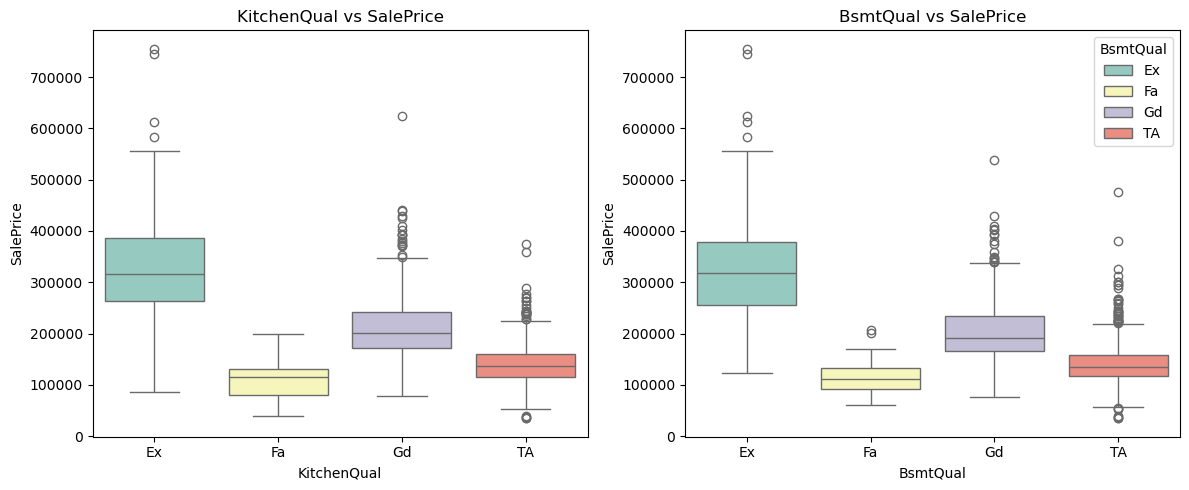

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['KitchenQual', 'BsmtQual']
n_rows = 1
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  # index to loop through list "cols"
        if i < len(cols):  # check if the index is within the range
            ax = axes[c]  # select the current subplot
            sns.boxplot(
                data=train_df,
                x=cols[i],
                y='SalePrice',
                ax=ax,  # plot on the current subplot
                palette='Set3',
                hue=cols[i]
            )
            ax.set_title(f'{cols[i]} vs SalePrice')
            ax.set_ylabel('SalePrice')
            ax.set_xlabel(cols[i])
            

plt.tight_layout();


### 3.2 EDA for Numerical Features
- Numerical:`OverallQual`,`GrLivArea`,`YearBuilt`,`GarageArea`,`TotRmsAbvGrd`,`1stFlrSf`,`BsmtFinSF1`,`FullBatch`,`Fireplaces`,`LotArea`,`MasVnrArea`

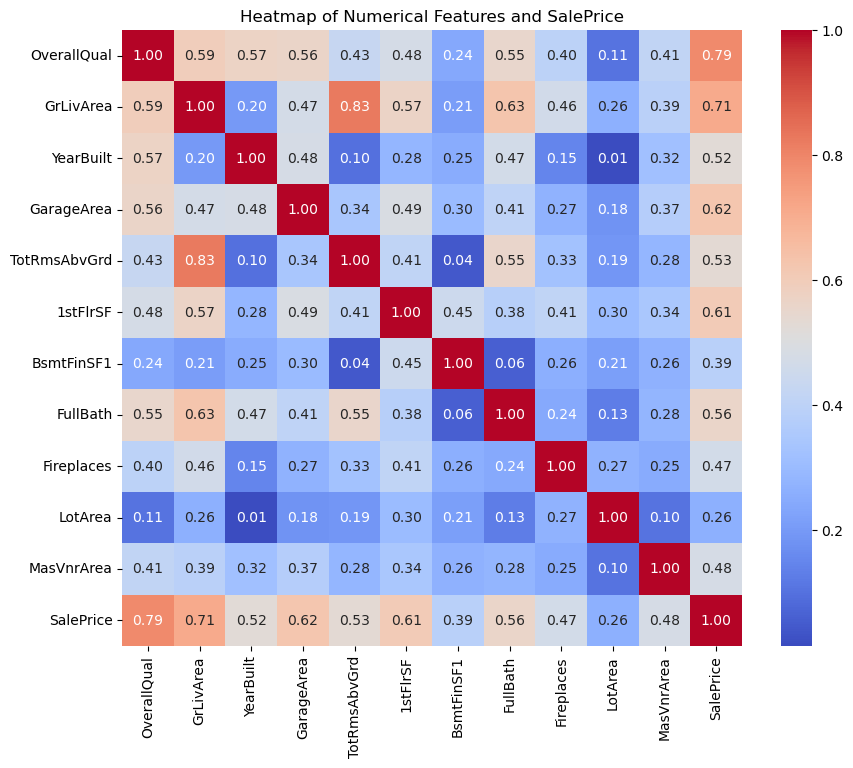

In [17]:
# Lấy các đặc điểm số và tính tương quan
numerical_cols = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotRmsAbvGrd', 
                  '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'Fireplaces', 'LotArea', 'MasVnrArea']
correlation = train_df[numerical_cols + ['SalePrice']].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features and SalePrice');



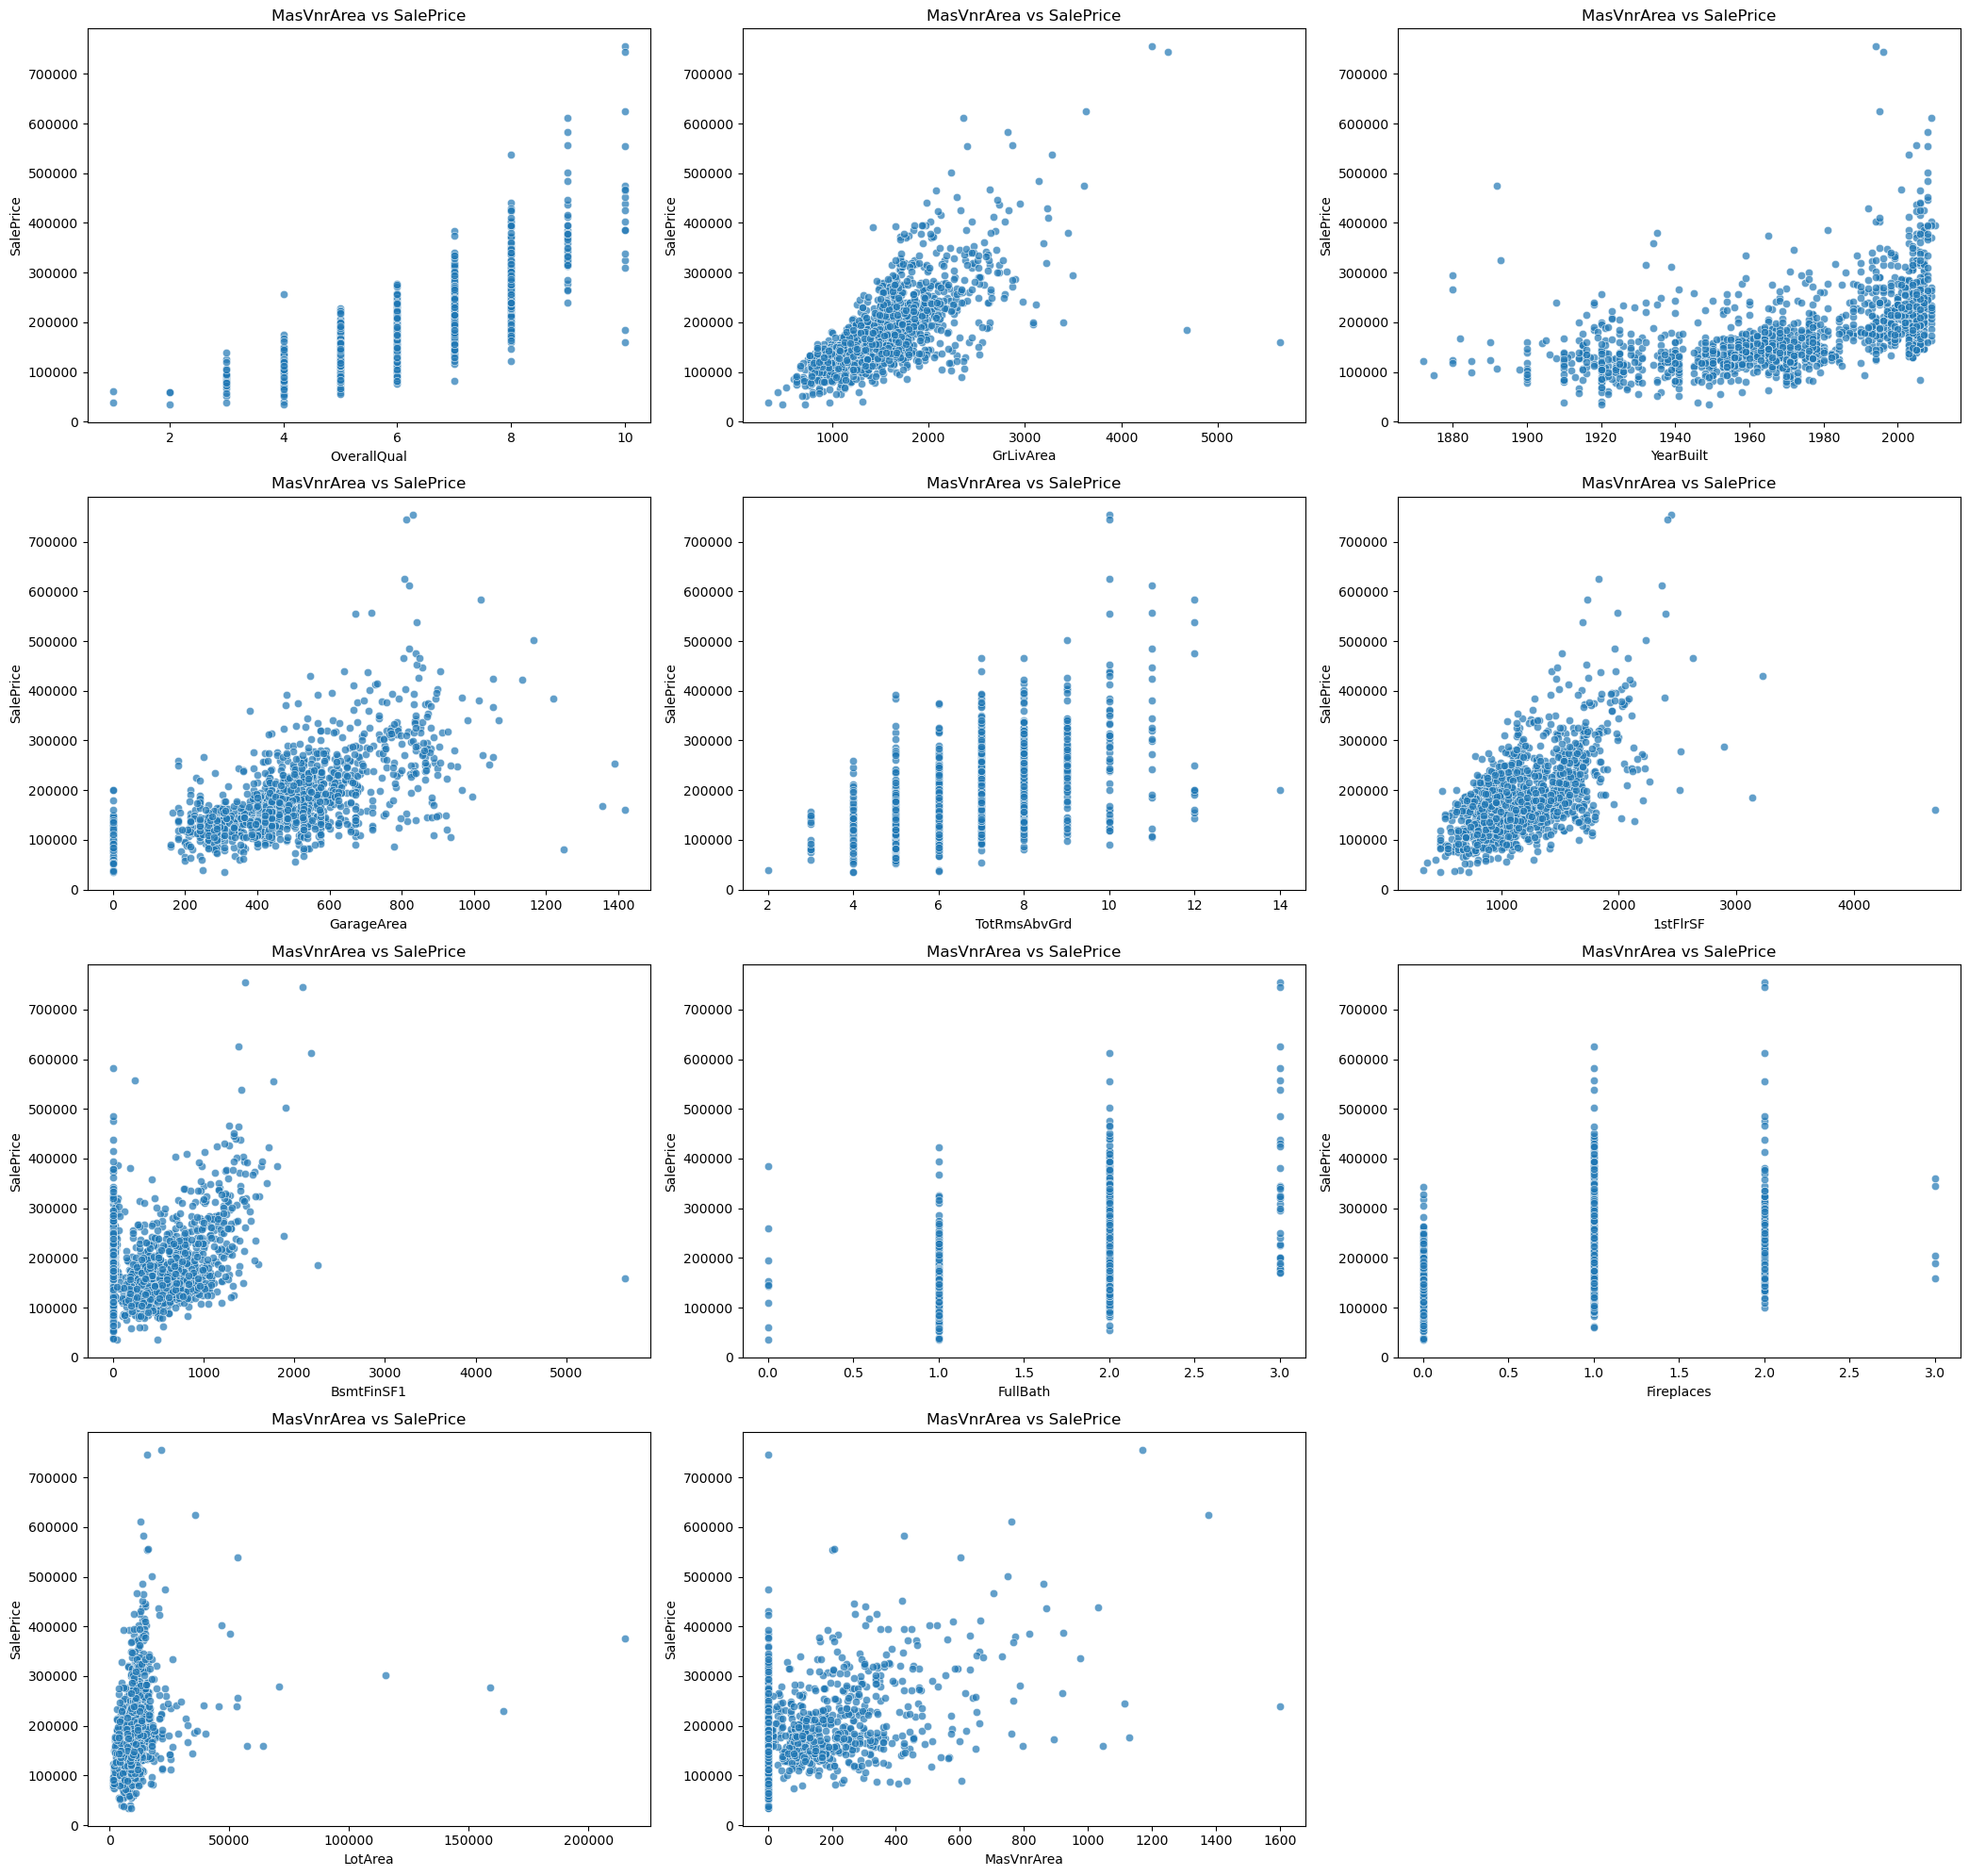

In [41]:
# Biểu đồ scatter cho từng đặc điểm số
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*5))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(numerical_cols):
            ax_i = axes[r,c]
            sns.scatterplot(data=train_df, x=numerical_cols[i], y='SalePrice', alpha=0.7,ax=ax_i)
            ax_i.set_title(f'{col} vs SalePrice')
            
axes.flat[-1].set_visible(False)
plt.tight_layout()
    


## 4. Data preprocessing

In [42]:
num_features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotRmsAbvGrd', 
                  '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'Fireplaces', 'LotArea', 'MasVnrArea']
cat_features = ['KitchenQual', 'BsmtQual']
feature_cols = num_features + cat_features
print(feature_cols)

['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'Fireplaces', 'LotArea', 'MasVnrArea', 'KitchenQual', 'BsmtQual']


In [80]:
def display_missing(df,feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count >0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Col MasVnrArea has 0.55% missing values.
Col BsmtQual has 2.53% missing values.
Col GarageArea has 0.07% missing values.
Col BsmtFinSF1 has 0.07% missing values.
Col MasVnrArea has 1.03% missing values.
Col KitchenQual has 0.07% missing values.
Col BsmtQual has 3.02% missing values.


In [86]:
# preprocess pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = train_df[feature_cols]
y = train_df["SalePrice"]
X_test = test_df[feature_cols]

num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ("imputer",SimpleImputer(strategy = "most_frequent")),
    ("encoder",OrdinalEncoder())
])



In [82]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])


In [83]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['OverallQual', 'GrLivArea', 'YearBuilt',
                                  'GarageArea', 'TotRmsAbvGrd', '1stFlrSF',
                                  'BsmtFinSF1', 'FullBath', 'Fireplaces',
                                  'LotArea', 'MasVnrArea']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['KitchenQual', 'BsmtQual'])])

In [84]:
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

In [85]:
X

array([[ 0.65147924,  0.37033344,  1.05099379, ...,  0.51410389,
         2.        ,  2.        ],
       [-0.07183611, -0.48251191,  0.15673371, ..., -0.57075013,
         3.        ,  2.        ],
       [ 0.65147924,  0.51501256,  0.9847523 , ...,  0.32591493,
         2.        ,  2.        ],
       ...,
       [ 0.65147924,  1.56964722, -1.00249232, ..., -0.57075013,
         2.        ,  3.        ],
       [-0.79515147, -0.83278768, -0.70440562, ..., -0.57075013,
         2.        ,  3.        ],
       [-0.79515147, -0.49393395, -0.20759447, ..., -0.57075013,
         3.        ,  3.        ]])

## 5 Model tranning

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)

In [88]:
x_train.shape,x_val.shape

((1168, 13), (292, 13))

In [89]:
X_test.shape

(1459, 13)